In [8]:
%matplotlib inline
import random as r
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#import scipy
import scipy.stats as st
from sklearn.preprocessing import normalize, scale
import pandas as pd

In [2]:
params = np.linspace(0,0.95,20)
wealth_distributions = []
# init_wd = np.full(wd_norms.shape[1],1.0)
# normalize(init_wd)
for param in params:
    filename = 'wealth_distribution_lambda_' + str(param) + '.txt'
    wd = np.loadtxt(filename)
    #wd = scale(wd, with_mean = True)
    #wd.reshape(len(wd),1)
    #wd = normalize(wd)
    wealth_distributions.append(wd)
wd

array([ 0.96853189,  1.07738916,  0.98467363,  0.92586858,  1.10572962,
        1.02205018,  1.02349249,  1.05359483,  0.97867068,  1.16883752,
        1.12692458,  0.88698011,  0.99659133,  0.95003714,  1.06593729,
        1.00987804,  0.84945207,  0.79070178,  1.13272903,  0.96830897,
        0.91086576,  0.98722452,  0.70648929,  0.847749  ,  1.19877198,
        0.9800205 ,  0.99424176,  0.79166426,  0.84848305,  1.05366221,
        1.07340654,  1.02961153,  0.93223146,  0.7842874 ,  1.08088056,
        0.77264298,  0.89316841,  1.20445232,  0.87503545,  0.92321434,
        1.06326182,  0.81029902,  1.01372891,  0.80932253,  0.87205731,
        0.9419258 ,  0.96378465,  0.92587218,  1.13589247,  1.04624801,
        0.94131101,  0.97569351,  1.20686585,  0.89127619,  0.97997036,
        0.92029338,  1.04590255,  0.94908717,  0.80851526,  1.01654917,
        1.38588668,  1.1158568 ,  1.14012535,  0.8182452 ,  0.87891853,
        0.97421321,  0.81411872,  1.09994718,  1.04169526,  1.17

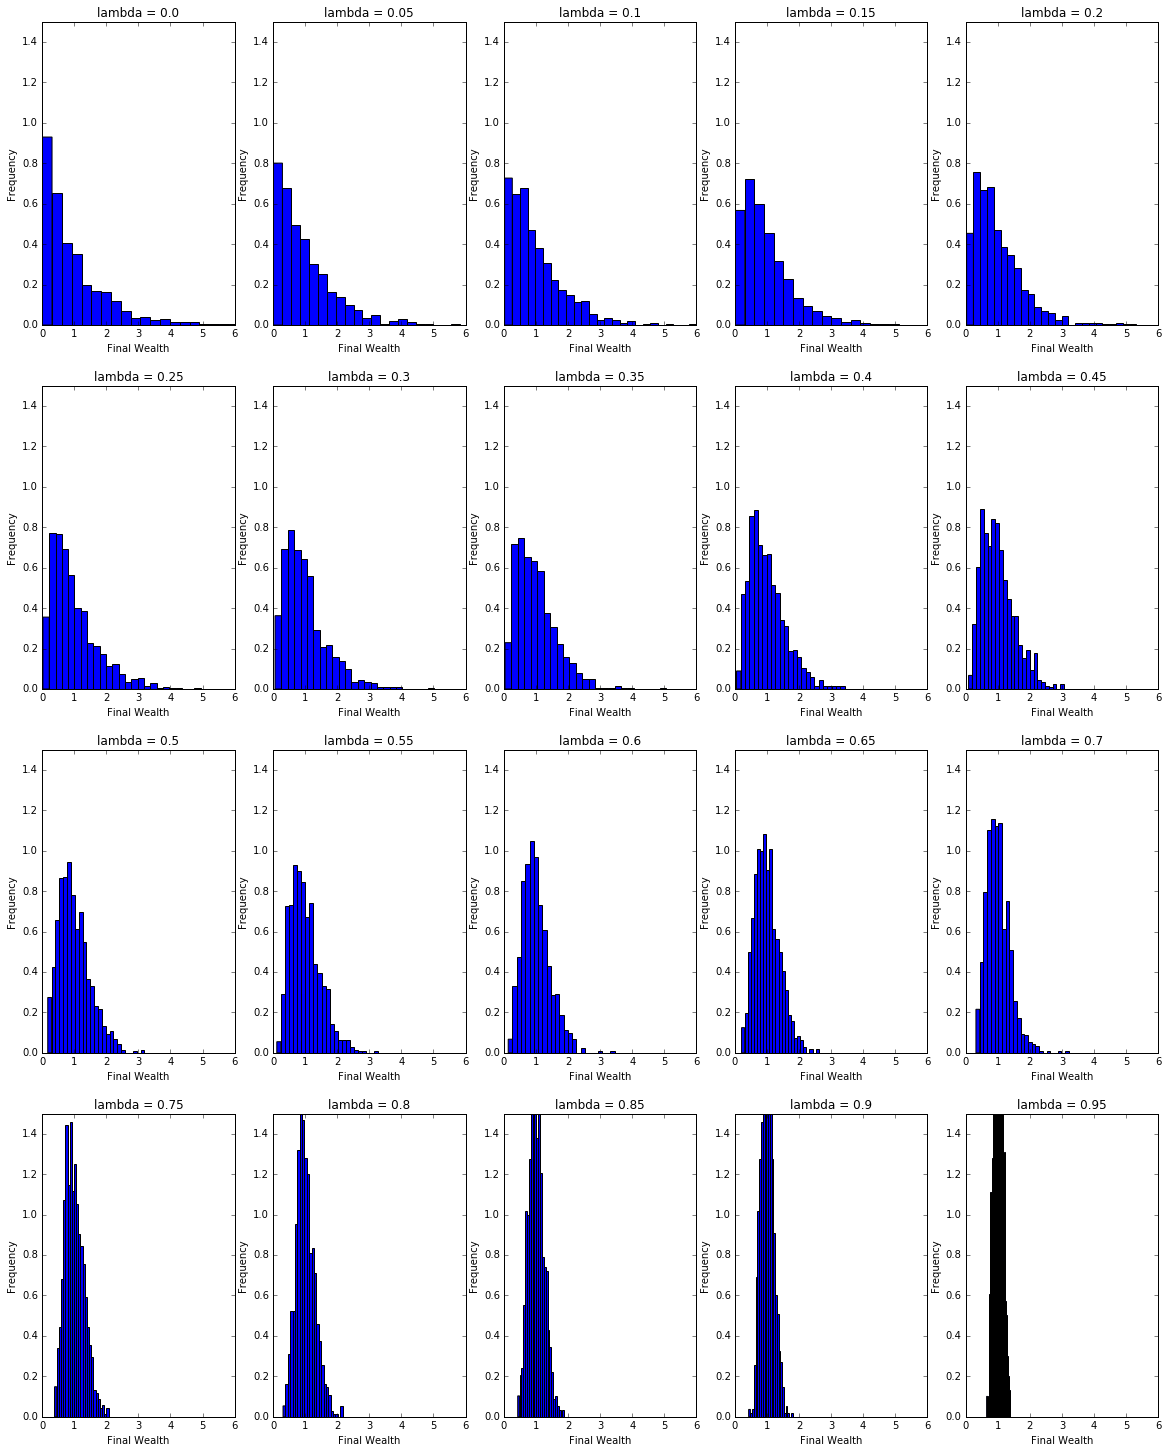

In [13]:
def plot_hists(dists, titles, h=1, w=1, n_row=2, n_col=5,x_min=0,x_max=1,y_min=0,y_max=1,figname=None):
    """Helper function to plot a gallery of histograms"""
    #plt.figure(figsize=(8 * n_col, 8* n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    f, axs = plt.subplots(n_row,n_col,figsize=(5*n_row, 5*n_col))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        dist_data = dists[i]
        plt.hist(dist_data, bins=25, normed=True)
        #hist, bin_edges = np.histogram(hist_data)
        #plt.bar(hist,bin_edges)
        #plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title('lambda = '+titles[i], size=12)
        #plt.xticks(np.arange(min(hist), max(hist)))
        #plt.xticks(np.arange(6))
        plt.xlim(x_min,x_max)
        plt.ylim(y_min,y_max)
        plt.xlabel('Final Wealth')
        plt.ylabel('Frequency')
        
    if figname == None:
        pass
    else:
        plt.savefig(figname)

params = np.round(params, 2)
titles = params.astype(str)
plot_hists(dists=wealth_distributions, titles=titles, n_row=4, n_col = 5,x_min=0,x_max=6,y_min=0,y_max=1.5,figname='hists_lambda.png')

    

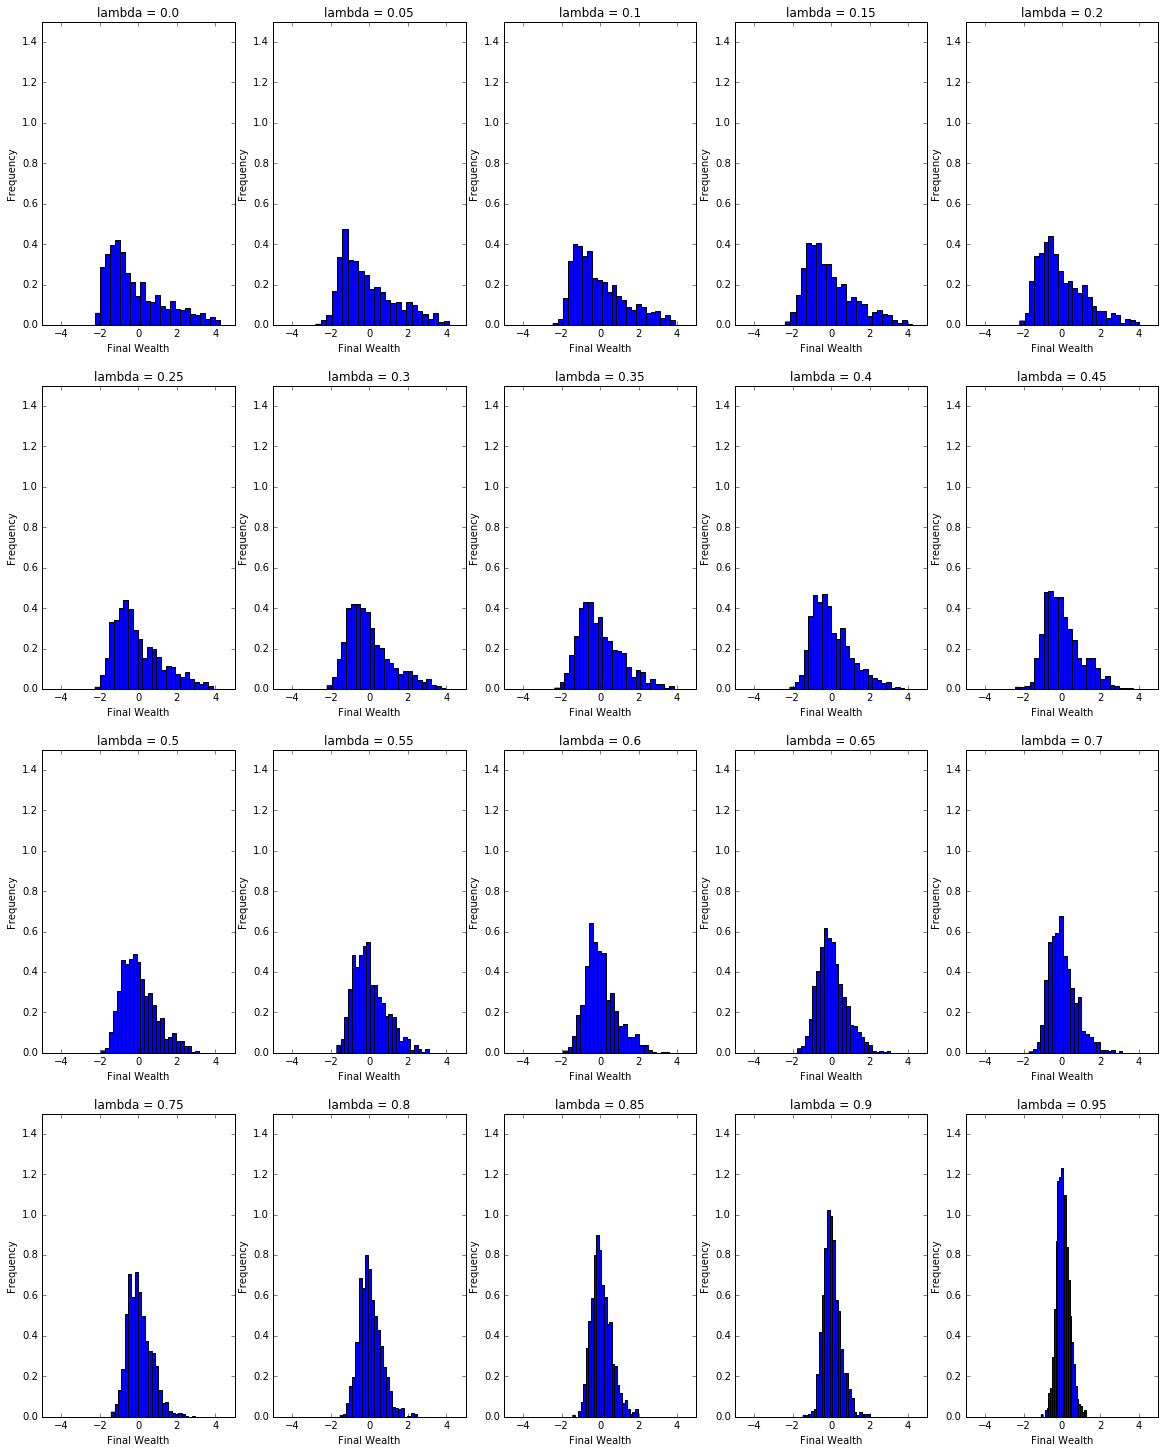

In [15]:
scaled_wds = scale(wealth_distributions, with_mean=True, with_std=True)
plot_hists(dists=scaled_wds, titles=titles, n_row=4, n_col = 5,x_min=-5,x_max=5,y_min=0,y_max=1.5,figname='hists_lambda_scaled.png')


In [5]:
import scipy
import statsmodels as sm

#size = 30000
wd = scaled_wds[5]
y,x = np.histogram(wd, density=True)
DISTRIBUTIONS = [        
        st.norm,st.pareto
]

for distribution in DISTRIBUTIONS:
    try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(wd)
                print(params)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                
    except Exception:
        pass


In [6]:
params

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95])

In [1]:
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

#matplotlib inline

#import warnings
#import numpy as np
#import pandas as pd
#import scipy.stats as st
#import statsmodels as sm
#import matplotlib
#import matplotlib.pyplot as plt

#matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
#matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
            st.norm,st.pareto
    ]


    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        #try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        #except Exception:
        #    pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

fit_names = []
fit_params = []


for data in scaled_wds:

    best_fit_name, best_fit_params = best_fit_distribution(data, 50)
    best_dist = getattr(st, best_fit_name)
    fit_names.append(best_fit_name)
    fit_params.append(best_fit_params)

lambdas = np.linspace(0,0.95,20)
lambda_df = pd.DataFrame({'lambda':lambdas, 'distribution':fit_names, 'params':fit_params}, index=lambdas)
lambda_df

NameError: name 'scaled_wds' is not defined

In [ ]:
alpha_gamma_df = pd.read_csv('wealth_distributions.csv')
wds = alpha_gamma_df['distribution'] = alpha_gamma_df.distribution.astype(np.ndarray)
wds.dtype# fit_names = []
# fit_params = []


# for data in scaled_wds:

#     best_fit_name, best_fit_params = best_fit_distribution(data, 50)
#     best_dist = getattr(st, best_fit_name)
#     fit_names.append(best_fit_name)
#     fit_params.append(best_fit_params)

In [ ]:
a = np.array(2)
type(a)